### I. PROBLEM STATEMENT

<p align="justify"> Diabetes mellitus is a chronic metabolic condition characterized by high blood glucose due to impaired insulin secretion, insulin resistance, or both. It is the most widespread and rapidly expanding disease, which is projected to increase by 10.9% (700 million cases) by 2045 [1]. Current treatment of diabetes is expensive, not available in remote settings, and technician dependent, which can make the process time-consuming and sometimes generate an imprecise outcome [2]. Thus, healthcare settings must have a fast and economical way to classify diabetes for early identification. The development of diabetes classification has recently gained significant attention. Various studies deal with the diabetes classification, but each solution has its own limitations. As described by the World Health Organization, symptoms of diabetes includes excessive excretion of urine (polyuria), thirst (polydipsia), constant hunger, weight loss, vision changes, and fatigue. These symptoms will be used as input features in the dataset, and the model is expected to classify whether the patient has diabetes or not based on the said input features. </p>

<p align="justify"> [1]	P. Saeedi et al., “Global and regional diabetes prevalence estimates for 2019 and projections for 2030 and 2045: results from the International Diabetes Federation Diabetes Atlas, 9th edition,” Diabetes Research and Clinical Practice, 107843, 2019. doi:10.1016/j.diabres.2019.107843 </p>

<p align="justify"> [2]	M. Islam, R. Ferdousi, S. Rahman, and H. Bushra, “Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques,” In: M. Gupta, D. Konar, S. Bhattacharyya, and S. Biswas (eds), “Computer Vision and Machine Intelligence in Medical Image Analysis,” Advances in Intelligent Systems and Computing, vol 992. Springer, Singapore, 2020. doi:10.1007/978-981-13-8798-2_12 </p>

### II. DATASET DESCRIPTION

<p align="justify"> The diabetes dataset is gathered by Islam et al. [2] using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet Bangladesh. The data collected has been made publicly available and can be used for data science and machine learning analytics. This study aims to utilize this diabetes dataset and apply them for machine learning algorithms. The Diabetes dataset has 17 features and 520 rows. Also, 16 features are in numerical data while there is only one in categorical data. </p>

The following is the labels of each column, along with its brief description:
1. __age__ – the age of the patient (ranging from 16 to 90 years old).
2. __gender__ – the gender of the patient (either male or female).
3. __polyuria__ – whether the patient experienced excessive urination (1) or not (0).
4. __polydipsia__ – whether the patient experienced excessive thirst or excessive drinking (1) or not (0).
5. __sudden_weight_loss__ – whether patient had an episode of sudden weight loss (1) or not (0).
6. __weakness__ – whether patient had an episode of feeling weak (1) or not (0). 
7. __polyphagia__ – whether patient had an episode of extreme hunger (1) or not (0).
8. __genital_thrush__ – whether patient had a yeast infection (1) or not (0).
9. __visual_blurring__ – whether patient had an episode of blurred vision (1) or not (0).
10. __itching__ – whether patient had an episode of itching (1) or not (0). 
11. __irritability__ – whether patient had an episode of irritability (1) or not (0).
12. __delayed_healing__ – whether patient had a noticeable delay in healing when wounded (1) or not (0).
13. __partial_paresis__ – whether patient had an episode of weakening of a muscle/group of muscles (1) or not (0).
14. __muscle_stiffness__ – whether patient had an episode of muscle stiffness (1) or not (0).
15. __alopecia__ – whether patient experienced hair loss (1) or not (0).
16. __obesity__ – whether patient can be considered obese (1) or not using his body mass index.
17. __class__ – whether the patient have diabetes (1) or not (0).

The dataset is available at: https://www.kaggle.com/datasets/andrewmvd/early-diabetes-classification

### III. EXPLORATORY DATA ANALYSIS (EDA)

#### 1. Read the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

## Data File:
data = pd.read_csv('diabetes_dataset.csv')

#### 2. The overview of the dataset:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

#### 3. Print the first and last five rows of the dataset

In [3]:
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
data.tail()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 4. The summary statistics of the dataset

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0
polyuria,520.0,0.496154,0.500467,0.0,0.0,0.0,1.0,1.0
polydipsia,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
sudden_weight_loss,520.0,0.417308,0.493589,0.0,0.0,0.0,1.0,1.0
weakness,520.0,0.586538,0.492928,0.0,0.0,1.0,1.0,1.0
polyphagia,520.0,0.455769,0.498519,0.0,0.0,0.0,1.0,1.0
genital_thrush,520.0,0.223077,0.416710,0.0,0.0,0.0,0.0,1.0
visual_blurring,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
itching,520.0,0.486538,0.500300,0.0,0.0,0.0,1.0,1.0
irritability,520.0,0.242308,0.428892,0.0,0.0,0.0,0.0,1.0


#### 5. The total count and total percentage of missing values in each column of the DataFrame.

In [6]:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
age,0,0.0
itching,0,0.0
obesity,0,0.0
alopecia,0,0.0
muscle_stiffness,0,0.0
partial_paresis,0,0.0
delayed_healing,0,0.0
irritability,0,0.0
visual_blurring,0,0.0
gender,0,0.0


#### 6. The nullity matrix and nullity correlation heatmap.

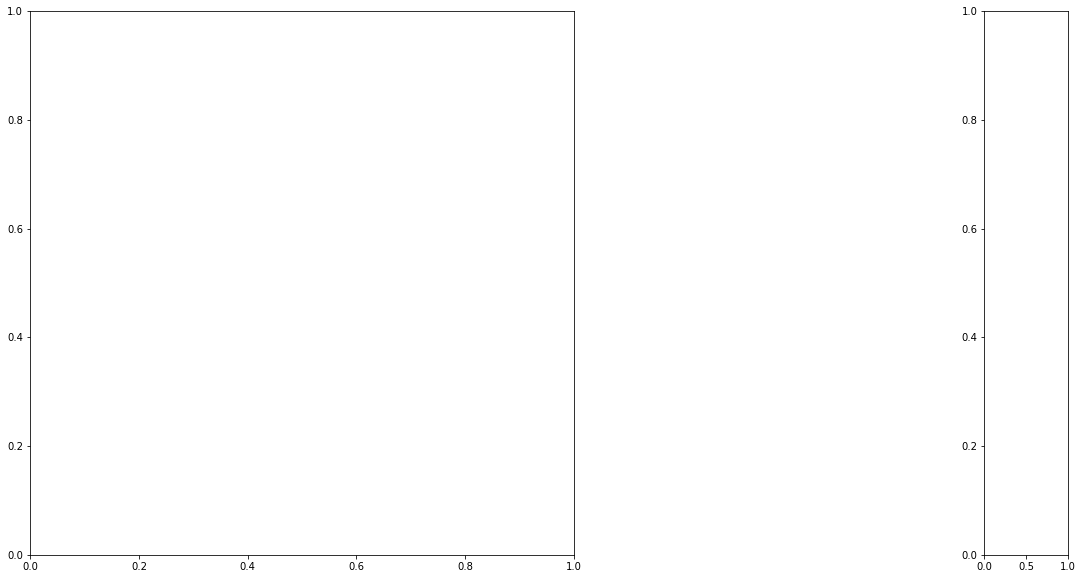

In [7]:
nullable_columns = data.columns[mask.any()].tolist()
try:
    msno.matrix(data[nullable_columns].sample(520))
except ValueError:
    pass

<p align="justify"> As observed in the figure above, the nullity matrix is empty since the dataset contains no missing values. The code below demonstrated that all values are already populated. </p>

<AxesSubplot:>

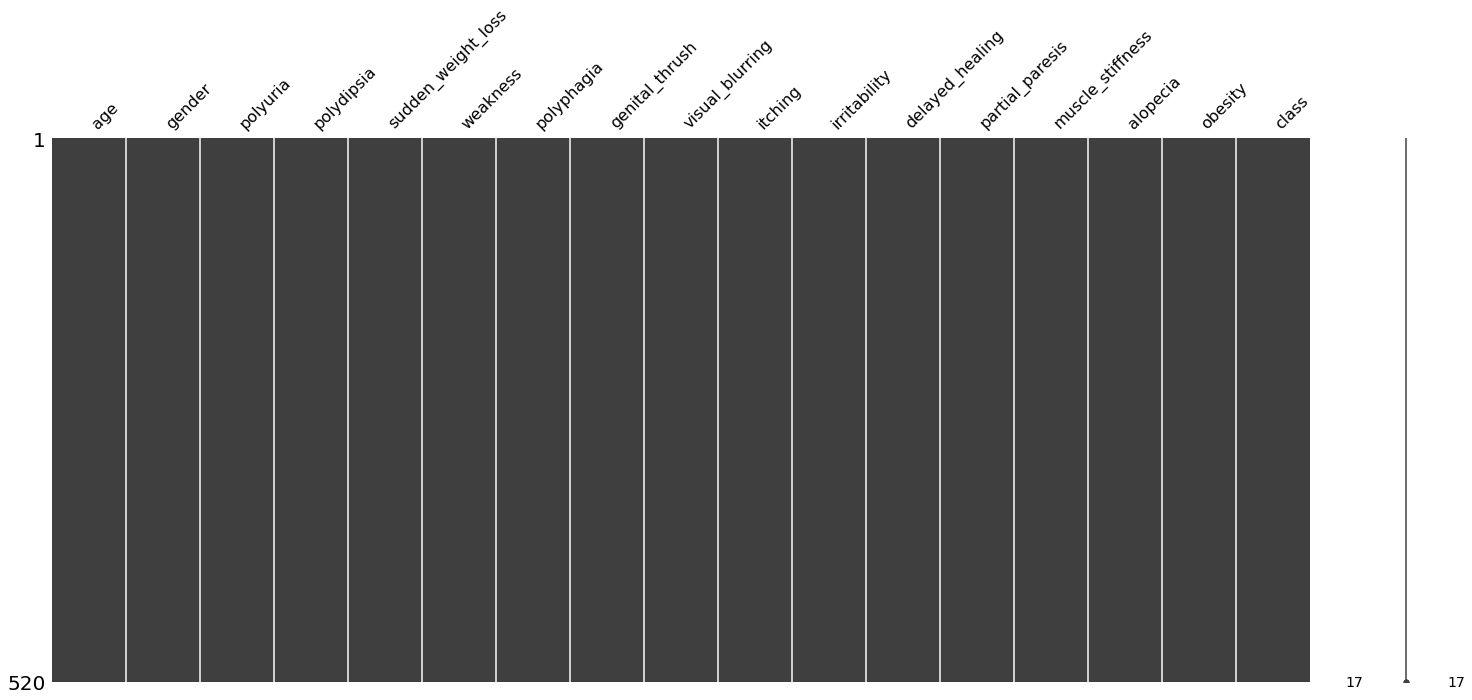

In [8]:
msno.matrix(data)

C:\Users\admin\anaconda3\envs\CpEE402Environment\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\admin\anaconda3\envs\CpEE402Environment\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


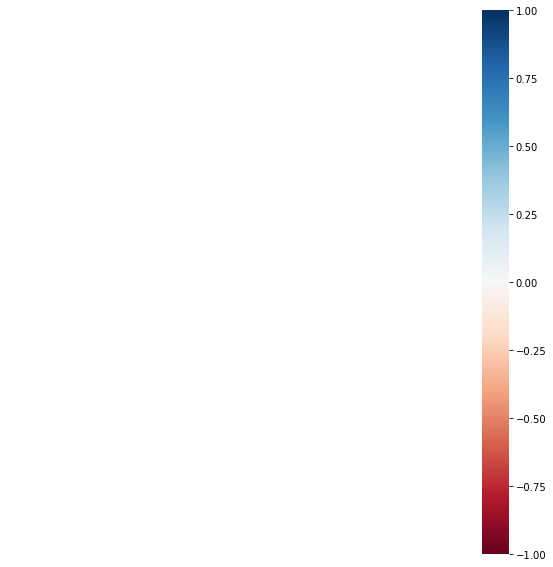

In [9]:
msno.heatmap(data[nullable_columns], figsize=(10,10))
plt.show()

### IV.  AI MODELLING (Applied Classification Analysis using ENSEMBLE)

#### 1. Import the required dependencies.

In [13]:
import pickle
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

#### 2. Read the cleaned data.

In [14]:
cleaned_data = pd.read_csv('diabetes_dataset.csv')
cleaned_data

,Unnamed: 0,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [15]:
cleaned_data.drop(["Unnamed: 0"], axis=1, inplace=True)
cleaned_data['gender'] = cleaned_data['gender'].replace(to_replace= ['Female', 'Male'], value = [0, 1])

In [16]:
cleaned_data

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


#### 3. Divide the dataset into train and validation DataFrames.


In [17]:
x = cleaned_data.drop(["class"], axis=True)
y = cleaned_data["class"]

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.20, random_state=11)

In [19]:
print("input - training set :", x_train.shape)
print("output - training set :", y_train.shape)
print("input - validation set :", x_val.shape)
print("output - validation set :", y_val.shape)

input - training set : (416, 16)
output - training set : (416,)
input - validation set : (104, 16)
output - validation set : (104,)


#### 4. Construct an Ensemble model (STACKING Ensemble) using 2 base classifiers and 1 stacked model.

NOTE: 
1. Hyperparameter Tuning: Choose a base classifier model and define the range of hyperparameter values corresponding to the model to be searched over for hyperparameter tuning. Use RandomizedSearchCV or any Hyperparameter tuning techniques. 
2. Once the tuning is complete, find the position (iteration number) at which the highest mean test score was obtained. Find the corresponding hyperparameters to be used for your based models and stacked model.
3. Split the dataset into training and validation sets and train a new model using the final hyperparameters on the training dataset. Use scikit-learn's train_test_split() method to split X and y into train and test components, with test comprising 15% of the dataset or any which can attain your target accuracy:
4. Train both your base models and stacked model using the final hyperparamters used from the hyperparameter tuning done in step 2.

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.20, random_state=11)

### KNN

In [21]:
params_knn = {"leaf_size": list(range(1,30)), "n_neighbors": list(range(1,50)), "p": [1,2]}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), params_knn, verbose=1, cv=5)
grid_search_knn.fit(x_train, y_train);
print ("Best Score: ", grid_search_knn.best_score_)
print ("Best Parameters: ", grid_search_knn.best_params_)
print ("Best Estimator: ", grid_search_knn.best_estimator_)

Fitting 5 folds for each of 2842 candidates, totalling 14210 fits
Best Score:  0.9109868043602983
Best Parameters:  {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}
Best Estimator:  KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)


### Decision tree

In [22]:
param_DT = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

decision_tree = DecisionTreeClassifier()
grid_DT = GridSearchCV(decision_tree, param_grid = param_DT, cv = 5, verbose = 1, n_jobs = -1)
grid_DT.fit(x_train,y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [23]:
print ("Best Score: ", grid_DT.best_score_)
print ("Best Parameters: ", grid_DT.best_params_)
print ("Best Estimator: ", grid_DT.best_estimator_)

Best Score:  0.9711130235226622
Best Parameters:  {'max_leaf_nodes': 84, 'min_samples_split': 4}
Best Estimator:  DecisionTreeClassifier(max_leaf_nodes=84, min_samples_split=4)


### Logistic regression

In [48]:
params_lr = {"C":np.logspace(-3,3,7), "penalty":["l2"], "max_iter":[1000]}

In [49]:
grid_search_lr = GridSearchCV(LogisticRegression(random_state=11), params_lr, cv=10)
grid_search_lr.fit(x_train, y_train)
print ("Best Score: ", grid_search_lr.best_score_)
print ("Best Parameters: ", grid_search_lr.best_params_)
print ("Best Estimator: ", grid_search_lr.best_estimator_)

Best Score:  0.935191637630662
Best Parameters:  {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'}
Best Estimator:  LogisticRegression(max_iter=1000, random_state=11)


In [26]:
KNN_params = {'leaf_size': 28, 'n_neighbors': 1, 'p': 1}
DT_params = {'max_leaf_nodes': 8, 'min_samples_split': 2}
LR_params = {'C': 1.0, 'penalty': 'l2'}

#### 5. The performance of the trained model.

In [27]:
knn = KNeighborsClassifier(**KNN_params)
knn.fit(x_train, y_train)
knnpred_val = knn.predict(x_val)
accuracyscore = accuracy_score(y_val, knnpred_val)
precisionscore = precision_score(y_val, knnpred_val, average='weighted')
recallscore = recall_score(y_val, knnpred_val, average='macro')
f1score = f1_score(y_val, knnpred_val, average = 'micro')
cm_rf = confusion_matrix(y_val, knnpred_val)
print("--RANDOM FOREST CLASSIFIER RESULTS--")
print("Accuracy: ", accuracyscore*100)
print("Precision: ", precisionscore*100)
print("Recall: ", recallscore*100)
print("F1-Score: ", f1score*100)
print("Confusion Matrix: \n", cm_rf)

--RANDOM FOREST CLASSIFIER RESULTS--
Accuracy:  92.3076923076923
Precision:  92.6510989010989
Recall:  92.72727272727272
F1-Score:  92.3076923076923
Confusion Matrix: 
 [[42  2]
 [ 6 54]]


In [28]:
dt = DecisionTreeClassifier(**DT_params, random_state=11)
dt.fit(x_train, y_train)
dtpred_val = dt.predict(x_val)
accuracyscore1 = accuracy_score(y_val, dtpred_val)
precisionscore1 = precision_score(y_val, dtpred_val, average='weighted')
recallscore1 = recall_score(y_val, dtpred_val, average='weighted')
f1score1 = f1_score(y_val, dtpred_val, average = 'micro')
cm_rf1 = confusion_matrix(y_val, dtpred_val)
print("--DECISION TREE CLASSIFIER RESULTS--")
print("Accuracy: ", accuracyscore1*100)
print("Precision: ", precisionscore1*100)
print("Recall: ", recallscore1*100)
print("F1-Score: ", f1score1*100)
print("Confusion Matrix: \n", cm_rf1)

--DECISION TREE CLASSIFIER RESULTS--
Accuracy:  90.38461538461539
Precision:  90.51682692307692
Recall:  90.38461538461539
F1-Score:  90.38461538461539
Confusion Matrix: 
 [[37  7]
 [ 3 57]]


In [29]:
estimator_list = [('knn', knn), ('dt', dt)]
stacked_model = StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegression(**LR_params))
stacked_model.fit(x_train, y_train)
stacked_preds_val = stacked_model.predict(x_val)
accuracyscore2 = accuracy_score(y_val, stacked_preds_val)
precisionscore2 = precision_score(y_val, stacked_preds_val, average='micro')
recallscore2 = recall_score(y_val, stacked_preds_val, average='micro')
f1score2 = f1_score(y_val, stacked_preds_val, average = 'micro')
cm_rf2 = confusion_matrix(y_val, stacked_preds_val)
print("--STACKED MODEL RESULTS--")
print("Accuracy: ", accuracyscore2*100)
print("Precision: ", precisionscore2*100)
print("Recall: ", recallscore2*100)
print("F1-Score: ", f1score2*100)
print("Confusion Matrix: \n", cm_rf2)

--STACKED MODEL RESULTS--
Accuracy:  90.38461538461539
Precision:  90.38461538461539
Recall:  90.38461538461539
F1-Score:  90.38461538461539
Confusion Matrix: 
 [[37  7]
 [ 3 57]]


#### 6. The plot of the model's performance.

In [30]:
y_val.replace([2],[1],inplace=True)

In [31]:
r_probs = [0 for _ in range(len(y_val))]
knearestneighbors_probs = knn.predict_proba(x_val)
decisiontree_probs = dt.predict_proba(x_val)
stackedmodel_probs = stacked_model.predict_proba(x_val)

In [32]:
knearestneighbors_probs = knearestneighbors_probs[:, 1]
decisiontree_probs = decisiontree_probs[:, 1]
stackedmodel_probs = stackedmodel_probs[:, 1]

In [33]:
r_auc = roc_auc_score(y_val, r_probs, multi_class = 'b')
knearetneighbors_auc = roc_auc_score(y_val, knearestneighbors_probs)
decisiontree_auc = roc_auc_score(y_val, decisiontree_probs)
stackedmodel_auc = roc_auc_score(y_val, stackedmodel_probs)

In [34]:
r_fpr, r_tpr, _ = roc_curve(y_val, r_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_val, knearestneighbors_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_val, decisiontree_probs)
sm_fpr, sm_tpr, _ = roc_curve(y_val, stackedmodel_probs)

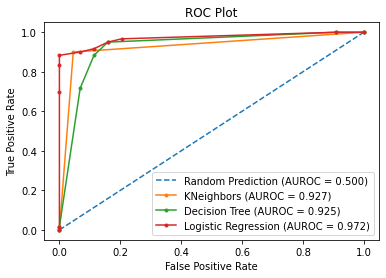

In [35]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUROC = %0.3f)' % r_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNeighbors (AUROC = %0.3f)' % knearetneighbors_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % decisiontree_auc)
plt.plot(sm_fpr, sm_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % stackedmodel_auc)

plt.title('ROC Plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

#### 7. Model testing and inference.

In [36]:
results = x_val.copy()
results ['Actual'] = y_val
results ['Predicted'] = stacked_model.predict(x_val)
results = results[['Actual', 'Predicted']]
results[:10]

,Actual,Predicted
123,1,0
109,1,1
467,0,0
221,0,0
454,1,1
87,1,1
393,0,0
315,0,1
57,1,1
60,1,1


#### 8. Export the Final Model using PICKLE Library.

In [37]:
filename = 'FINAL_MODEL_diabetes.pkl'
pickle.dump(stacked_model, open(filename,'wb'))